![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [181]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [182]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [183]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [184]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [185]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [186]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [187]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [188]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [189]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [190]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [192]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
46583,id_6921,Paris,['Japanese'],6922.0,$$ - $$$,17.0,"[['Decent', 'Convenient and affordable'], ['05...",/Restaurant_Review-g187147-d8786061-Reviews-Os...,d8786061,1,4.0
20791,id_8913,Paris,NaN,8915.0,NaN,9.0,"[['good bread, expensive water, helpful servi....",/Restaurant_Review-g187147-d7817857-Reviews-La...,d7817857,1,4.0
5670,id_5670,Paris,"['Chinese', 'Asian', 'Vietnamese', 'Fusion', '...",803.0,$,369.0,"[[""A vegetarian's staple go-to restaurant"", 'G...",/Restaurant_Review-g187147-d786928-Reviews-Tie...,d786928,0,0.0
9042,id_9042,Athens,NaN,912.0,NaN,3.0,"[['Amazing food from amazing people'], ['11/19...",/Restaurant_Review-g189400-d12493029-Reviews-M...,d12493029,0,0.0
15371,id_1110,Rome,"['Italian', 'Pizza', 'Seafood', 'Mediterranean...",1111.0,$$ - $$$,867.0,"[['Fantastic staff, food and atmosphere!', 'So...",/Restaurant_Review-g187791-d2253455-Reviews-La...,d2253455,1,4.0


In [193]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [194]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [195]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [196]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [197]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [198]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)


In [199]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
25449,id_5753,NaN,5755.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187323-d12320629-Reviews-H...,d12320629,1,3.5,...,0,0,0,0,0,0,0,0,0,0
2260,id_2260,"['Delicatessen', 'Austrian', 'European', 'Vege...",3410.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g190454-d4185368-Reviews-Te...,d4185368,0,0.0,...,0,0,0,0,0,0,1,0,0,0
23418,id_1336,"['Indian', 'Asian', 'Bangladeshi', 'Vegetarian...",1337.0,$$ - $$$,68.0,"[['Cheap&Good', 'Sober but nice'], ['11/25/201...",/Restaurant_Review-g1136501-d3486958-Reviews-L...,d3486958,1,4.0,...,0,0,0,0,0,0,0,0,0,0
10217,id_13892,"['French', 'Healthy', 'Delicatessen', 'Street ...",13894.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g187147-d8660001-Reviews-Ch...,d8660001,1,5.0,...,0,0,1,0,0,0,0,0,0,0
48871,id_728,"['Cafe', 'European', 'Vegetarian Friendly']",732.0,$$ - $$$,30.0,"[['Pleasant lunch!', 'On top of the ZH city ce...",/Restaurant_Review-g188113-d8145190-Reviews-Gr...,d8145190,1,4.0,...,0,0,0,0,0,0,0,0,1,0


#### Возьмем следующий признак "Price Range".

In [201]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [202]:
# Ваша обработка 'Price Range'

sum(data['Price Range'].isna())
# Почти 35% данных в этом признаке отсутствуют (NaN)

# Заменим NaN на наиболее часто встречающееся значение: '$$ - $$$'
data['Price Range'].fillna('$$ - $$$', inplace=True)

# Поменяем тип данных в столбце с Object на String
data['Price Range'] = data['Price Range'].astype(str)

# Используем кодировщик из библиотеки sklearn для преобразования последователного признака в числовой
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['Price Range'] = labelencoder.fit_transform(data['Price Range'])

data['Price Range']

0        1
1        1
2        1
3        2
4        2
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Price Range, Length: 50000, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [203]:
# тут ваш код на обработку других признаков

# Обработка признака Cuisine Style

# применим к столбцу Cuisine Style операцию по удалению пробелов
data['Cuisine Style'] = data['Cuisine Style'].str.strip()

# Обработка для Cuisine Style: убираем скобки, запятые и кавычки, преобразуем строки с список
def str_to_list(string):
    if pd.isnull(string):
        return []
    else:
        string = string.replace('"', '')
        string = string.replace('[', '')
        string = string.replace(']', '')
        string = string.replace("'", '')
        return string.split(', ')

# преобразуем стили кухонь в списки
data['Cuisine_style'] = data['Cuisine Style'].apply(str_to_list)

# удаляем столбец с кухнями
# data.drop(['Cuisine Style'], axis=1, inplace=True)

# создаем объект множества для хранения перечня кухонь
cuisine_set = set()
for cuis_list in data['Cuisine_style']:
    for cuis in cuis_list:
        cuisine_set.add(cuis)

# Добавление признака, в котором подсчитывается количество кухонь в ресторане
data['Cuisine_amount'] = data.Cuisine_style.apply(len)

# Нахождение наиболее популярных типов кухни

cuisine_by_popularity = data['Cuisine_style'].explode()
print(cuisine_by_popularity.value_counts())

# Создаем новый числовой признак наличия в ресторане наиболее популярных типов кухни
# (от 4 до 0 по убыванию)

data['Popular_cuisine'] = data['Cuisine_style'].apply(lambda x:
        4 if ('Vegetarian Friendly' and 'European' and 'Mediterranean' and 'Italian') in x 
        else 3 if ('Vegetarian Friendly' and 'European' and 'Mediterranean') in x 
        else 2 if ('Vegetarian Friendly' and 'European') in x 
        else 1 if ('Vegetarian Friendly') in x 
        else 0)

Vegetarian Friendly    14021
European               12561
Mediterranean           7820
Italian                 7433
Vegan Options           5684
                       ...  
Yunnan                     2
Burmese                    1
Salvadoran                 1
Latvian                    1
Xinjiang                   1
Name: Cuisine_style, Length: 125, dtype: int64


In [204]:
# Опрделеяем наиболее популярные у ресторанов типы кухни

cuisine_by_popularity = data['Cuisine_style'].explode()
print(cuisine_by_popularity.value_counts())

# Создаем 5 новых численных признаков по наличию в ресторане наиболее популярных типов кухни
# (от 5 до 0 по убыванию)

# data['Vegetarian Friendly'] = data['Cuisine_style'].apply(lambda x: 1 if 'Vegetarian Friendly' in x else 0)
# data['European'] = data['Cuisine_style'].apply(lambda x: 1 if 'Vegetarian Friendly' in x else 0)
# data['Mediterranean'] = data['Cuisine_style'].apply(lambda x: 1 if 'Vegetarian Friendly' in x else 0)
# data['Italian'] = data['Cuisine_style'].apply(lambda x: 1 if 'Vegetarian Friendly' in x else 0)
# data['Vegan Options'] = data['Cuisine_style'].apply(lambda x: 1 if 'Vegetarian Friendly' in x else 0)

Vegetarian Friendly    14021
European               12561
Mediterranean           7820
Italian                 7433
Vegan Options           5684
                       ...  
Yunnan                     2
Burmese                    1
Salvadoran                 1
Latvian                    1
Xinjiang                   1
Name: Cuisine_style, Length: 125, dtype: int64


In [205]:
# Обработка признака Reviews

# Импортируем библиотеки для работы с регулярными выражениями и датами
import re
from datetime import datetime

# Функция для выделения дат из столбца со строковыми значениями
def dates_from_review(review):

    pattern = re.compile('\'\d+\/\d+\/\d+\'?') # Создаем патерн даты
    dat = pattern.findall(review) # Выделяем строковое значение по патерну 
    
    if len(dat) >= 1: # Создаем условие для непустых ячеек
        datetime_list = [] # Создаем список для занесения дат
        for date in dat:
            date = date[1:-1]
            dt = datetime.strptime(date, '%m/%d/%Y') # переводим строковые значения в формат дат
            datetime_list.append(dt)
        return datetime_list
    else:
        return (dat)
data['Reviews'] = data['Reviews'].astype(str) # Меняем формат Object на String

data['review_dates'] = data['Reviews'].apply(lambda x: dates_from_review(x)) # Создаем новый столбец с датами отзывов

# Создаем новый столбец с числовыми значениями, равными количеству дней между последним и первым отзывами, 0 - если отзывов нет
data['Gap'] = data['review_dates'].apply(lambda x: (x[0]-x[-1]).days if len(x) >= 2 else 0)

# создаем столбец с длинами списков дат отзывов, убеждаемся, что в каждой ячейке не больше двух дат
data['Len_list_of_dates_review'] = data['review_dates'].apply(lambda x: len(x))
data['Len_list_of_dates_review'].max()

# Создаем новый признак: дата последнего отзыва
data['Last_review'] = data['review_dates'].apply(lambda x: max(x[0], x[1]) if len(x)==2 else x[0] if len(x)==1 else None)
data['Last_review'] = pd.to_datetime(data['Last_review'])
data['Last_review'].max()

# Создаем новый признак: дней от даты самого последнего отзыва в датасете до последнего отзыва в ячейке

data['days_from_last_review'] = data['Last_review'].apply(lambda x: (data['Last_review'].max() - x).days)

# заполняем NaN средним значением из столбца
data['days_from_last_review'].fillna(data['days_from_last_review'].mean(), inplace=True)

# удаляем ненужные столбцы: Len_list_of_dates_review, Last_review:
data.drop(['Len_list_of_dates_review','Last_review',], axis = 1, inplace=True)

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

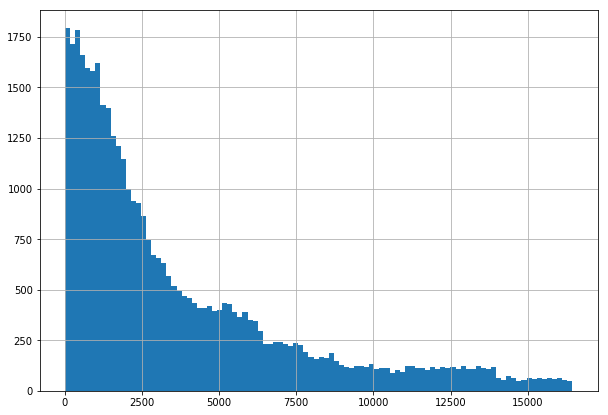

In [206]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

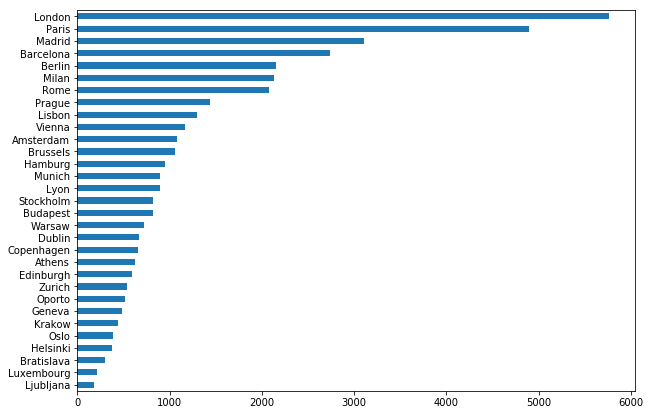

In [207]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

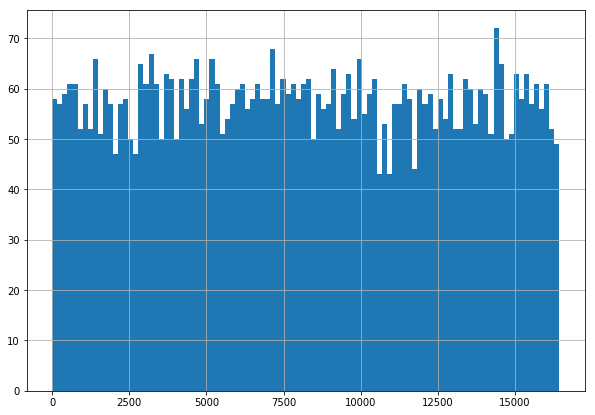

In [208]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

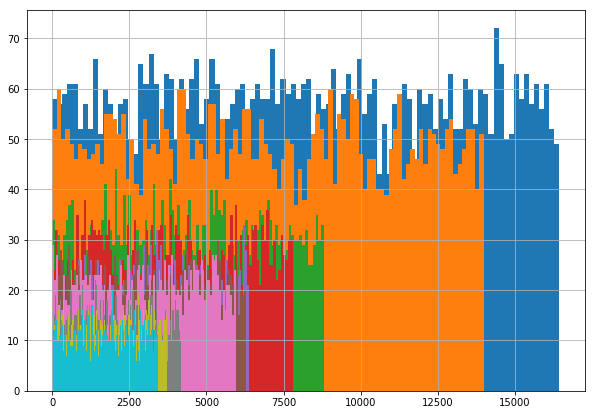

In [209]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


In [210]:
def edit_ranking(df_input):
    # all about edit
    df = df_input.copy()    
    
    # приведем значения к виду от -1 до 1

    # средний ранкинг для каждого города
    mean_per_city = df.groupby('City')['Ranking'].mean()
    df['mean_ranking_per_city'] = df['City'].apply(lambda x: mean_per_city[x])

    #  масмимальный ранкинг для каждого города
    max_per_city = df.groupby('City')['Ranking'].max()
    df['max_ranking_per_city'] = df['City'].apply(lambda x: max_per_city[x])

    # стандартизация
    df['stand_ranking'] = (df['Ranking'] - df['mean_ranking_per_city']) / df['max_ranking_per_city']
    
    return df

In [211]:
edit_ranking(df_train).sample(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,mean_ranking_per_city,max_ranking_per_city,stand_ranking
27886,id_1207,Copenhagen,"['Japanese', 'Sushi', 'Asian']",1209.0,3.5,$$ - $$$,47.0,"[['Very good food', 'The best sushi place i ha...",/Restaurant_Review-g189541-d812802-Reviews-Sus...,d812802,1,974.699545,1964.0,0.119298
13843,id_6050,London,"['Bar', 'British', 'Pub', 'Grill', 'Vegetarian...",6059.0,3.5,$$ - $$$,176.0,"[['Get a table with a view', 'A little jem tuc...",/Restaurant_Review-g186338-d944622-Reviews-Yac...,d944622,1,8198.461873,16444.0,-0.130106


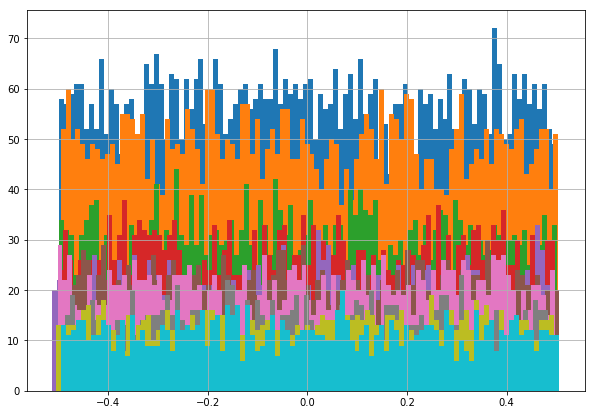

In [212]:
# посмотрим обновленое распределение для тех же городов
test_data = edit_ranking(df_train)
for x in (test_data['City'].value_counts())[0:10].index:
    test_data['stand_ranking'][test_data['City'] == x].hist(bins=100)
plt.show()

In [213]:
# Пропуски в признаке устранены. В каждом городе распределение равномерное. 
# Т.е. смещение происходило от размера города

### Посмотрим распределение целевой переменной

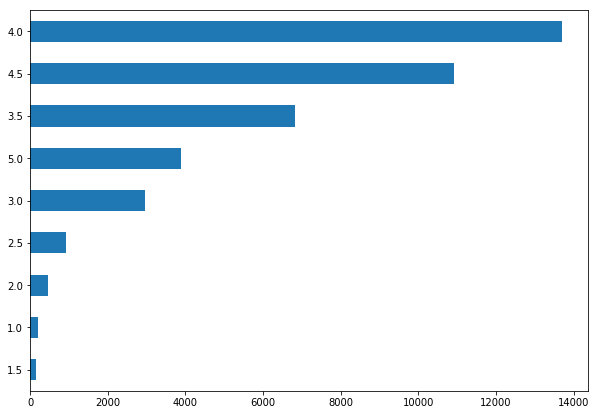

In [214]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

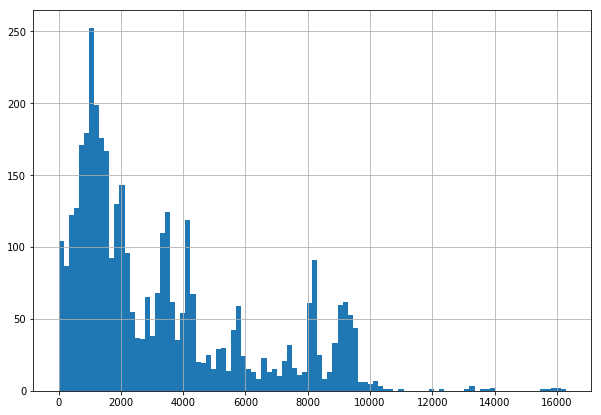

In [215]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

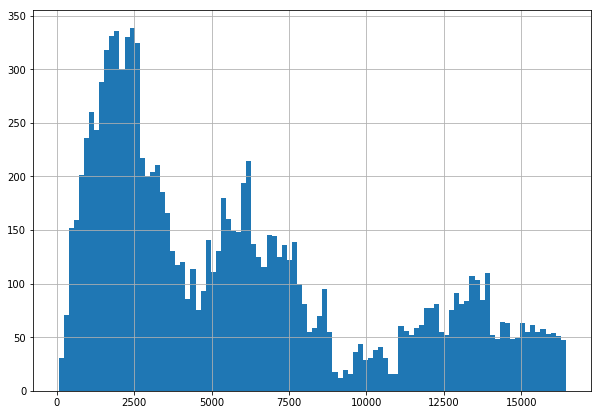

In [216]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

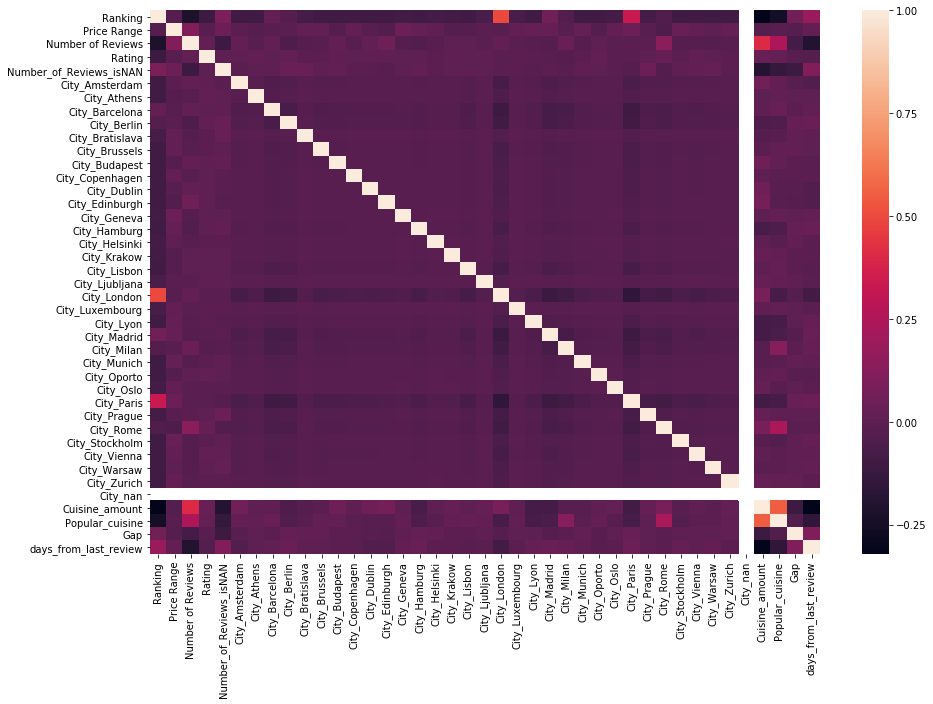

In [217]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [218]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [219]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN

    # Заменим NaN в столбце Price Range на наиболее часто встречающееся значение: '$$ - $$$'
    df_output['Price Range'].fillna('$$ - $$$', inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df1 = df_output['City']
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    df_output = pd.concat([df_output, df1], axis=1)
    # тут ваш код не Encoding фитчей
    
    # Обработка признака Price Range
    
    # Поменяем тип данных в столбце Price Range с Object на String
    df_output['Price Range'] = df_output['Price Range'].astype(str)

    # Используем кодировщик из библиотеки sklearn для преобразования последователного признака 
    # в числовой
    from sklearn.preprocessing import LabelEncoder

    labelencoder = LabelEncoder()
    df_output['Price Range'] = labelencoder.fit_transform(df_output['Price Range'])
    
    # Обработка признака Cuisine Style

    # Применим к столбцу Cuisine Style операцию по удалению пробелов
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.strip()

    # Убираем скобки, запятые и кавычки, преобразуем строки с список
    def str_to_list(string):
        if pd.isnull(string):
            return []
        else:
            string = string.replace('"', '')
            string = string.replace('[', '')
            string = string.replace(']', '')
            string = string.replace("'", '')
            return string.split(', ')

    # преобразуем стили кухонь в списки
    df_output['Cuisine_style'] = df_output['Cuisine Style'].apply(str_to_list)

    # удаляем столбец с кухнями
    # df_output.drop([], axis=1, inplace=True)

    # создаем объект множества для хранения перечня кухонь
    cuisine_set = set()
    for cuis_list in df_output['Cuisine_style']:
        for cuis in cuis_list:
            cuisine_set.add(cuis)
            
    # Обработка признака Ranking
    
    df_output = edit_ranking(df_output)
    
    # Обработка признака Reviews

    # Импортируем библиотеки для работы с регулярными выражениями и датами
    import re
    from datetime import datetime

    # Функция для выделения дат из столбца со строковыми значениями
    def dates_from_review(review):

        pattern = re.compile('\'\d+\/\d+\/\d+\'?') # Создаем патерн даты
        dat = pattern.findall(review) # Выделяем строковое значение по патерну 

        if len(dat) >= 1: # Создаем условие для непустых ячеек
            datetime_list = [] # Создаем список для занесения дат
            for date in dat:
                date = date[1:-1]
                dt = datetime.strptime(date, '%m/%d/%Y') # переводим строковые значения в формат дат
                datetime_list.append(dt)
            return datetime_list
        else:
            return (dat)
    df_output['Reviews'] = df_output['Reviews'].astype(str) # Меняем формат Object на String
    
    # Создаем новый столбец с датами отзывов
    df_output['review_dates'] = df_output['Reviews'].apply(lambda x: dates_from_review(x)) 
    
    # Заполняем нулевые значения в столбце Number of Reviews там, где в столбце review_dates есть непустые значения
    for i in range(0, len(data['Number of Reviews'])-1):
        if data['Number of Reviews'][i] == 0 and len(data['review_dates'][i])>= 1:
            data['Number of Reviews'][i] = len(data['review_dates'][i])

    # Создаем столбец с длинами списков дат отзывов, убеждаемся, что в каждой ячейке не больше двух дат
    df_output['Len_list_of_dates_review'] = df_output['review_dates'].apply(lambda x: len(x))
    df_output['Len_list_of_dates_review'].max()

    # Создаем новый признак: дата последнего отзыва
    df_output['Last_review'] = df_output['review_dates'].apply(lambda x: max(x[0], x[1]) if len(x)==2
                                    else x[0] if len(x)==1 else None)
    df_output['Last_review'] = pd.to_datetime(df_output['Last_review'])
    df_output['Last_review'].max()


    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    
    # Добавляем новый признак с числом типов кухонь в каждом ресторане
    df_output['Cuisine_amount'] = df_output.Cuisine_style.apply(len)
    
    # Создаем новый числовой признак наличия в ресторане наиболее популярных типов кухни
    # (от 4 до 0 по убыванию)


    df_output['Popular_cuisine'] = df_output['Cuisine_style'].apply(lambda x:
            4 if ('Vegetarian Friendly' and 'European' and 'Mediterranean' and 'Italian') in x 
            else 3 if ('Vegetarian Friendly' and 'European' and 'Mediterranean') in x 
            else 2 if ('Vegetarian Friendly' and 'European') in x 
            else 1 if ('Vegetarian Friendly') in x 
            else 0)    


    # Создаем новый признак с числовыми значениями, 
    # равными количеству дней между последним и первым отзывами, 0 - если отзывов нет
    df_output['Gap'] = df_output['review_dates'].apply(lambda x: abs((x[0]-x[-1]).days) if len(x) >= 2 else 0)
    
    # Создаем новый признак с числом дней от даты самого последнего отзыва в датасете до 
    # последнего отзыва в ячейке
    df_output['days_from_last_review'] = df_output['Last_review'].apply(lambda x: (df_output['Last_review'].max() - x).days)
    # Заполняем NaN средним значением из столбца
    df_output['days_from_last_review'].fillna(df_output['days_from_last_review'].mean(), inplace=True)
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    # Удаляем другие ненужные столбцы типов, отличных от Oject
    df_output.drop(['Len_list_of_dates_review', 'Last_review',], axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [220]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Warsaw,City_Zurich,City_nan,mean_ranking_per_city,max_ranking_per_city,stand_ranking,Cuisine_amount,Popular_cuisine,Gap,days_from_last_review
36176,626.0,1,14.0,1,4.0,0,0,0,0,0,...,0,0,0,713.227119,1413.0,-0.061732,0,0,0,653.000000
39476,2306.0,1,20.0,1,4.5,1,0,0,0,0,...,0,0,0,1591.589650,3254.0,0.219548,2,0,478,379.000000
27470,8419.0,2,13.0,1,5.0,0,0,0,0,0,...,0,0,0,8169.707354,16444.0,0.015160,4,2,72,433.000000
28002,14023.0,1,246.0,1,3.0,0,0,0,0,0,...,0,0,0,8169.707354,16444.0,0.355953,4,1,74,73.000000
26417,5016.0,0,12.0,1,4.5,0,0,0,0,0,...,0,0,0,2970.733102,5948.0,0.343858,1,4,0,290.045361
15185,1219.0,1,3.0,1,4.5,0,1,0,0,0,...,0,0,0,880.213918,1787.0,0.189584,2,3,0,1032.000000
42284,426.0,1,137.0,1,4.0,0,0,0,0,0,...,0,0,0,1375.409781,2737.0,-0.346880,4,2,89,147.000000
209,563.0,0,51.0,0,0.0,0,0,0,0,0,...,0,0,0,616.267148,1244.0,-0.042819,3,0,136,162.000000
22070,2408.0,1,102.0,1,4.5,0,0,0,0,0,...,0,0,0,6938.557138,13986.0,-0.323935,5,2,23,372.000000
3374,1341.0,0,23.0,0,0.0,0,0,0,0,0,...,0,0,0,1867.330298,3717.0,-0.141601,3,3,69,9.000000


In [221]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
Ranking                  50000 non-null float64
Price Range              50000 non-null int64
Number of Reviews        50000 non-null float64
sample                   50000 non-null int64
Rating                   50000 non-null float64
City_Amsterdam           50000 non-null uint8
City_Athens              50000 non-null uint8
City_Barcelona           50000 non-null uint8
City_Berlin              50000 non-null uint8
City_Bratislava          50000 non-null uint8
City_Brussels            50000 non-null uint8
City_Budapest            50000 non-null uint8
City_Copenhagen          50000 non-null uint8
City_Dublin              50000 non-null uint8
City_Edinburgh           50000 non-null uint8
City_Geneva              50000 non-null uint8
City_Hamburg             50000 non-null uint8
City_Helsinki            50000 non-null uint8
City_Krakow              50000 non-null uint8
City_Lisbon

In [222]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [223]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [224]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 42), (32000, 42), (8000, 42))

# Model 
Сам ML

In [225]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [226]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [227]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [228]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20220999999999997


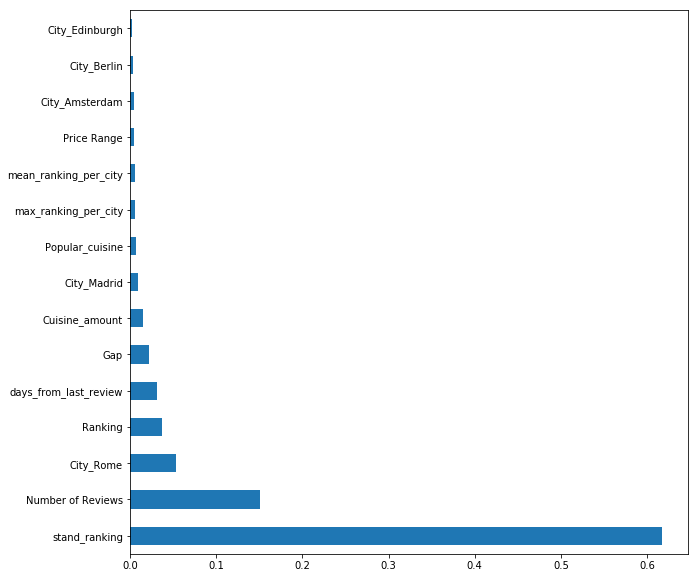

In [229]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [230]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,City_Warsaw,City_Zurich,City_nan,mean_ranking_per_city,max_ranking_per_city,stand_ranking,Cuisine_amount,Popular_cuisine,Gap,days_from_last_review
8211,2545.0,1,32.0,0.0,0,0,0,0,0,0,...,0,0,0,2086.979626,4188.0,0.109365,3,0,325,85.0
6985,57.0,1,642.0,0.0,0,0,0,0,0,0,...,0,0,0,1867.330298,3717.0,-0.487041,6,1,6,1.0
7810,2910.0,1,8.0,0.0,0,0,1,0,0,0,...,0,0,0,3879.422680,7796.0,-0.124349,1,4,12,236.0
5193,843.0,1,41.0,0.0,0,0,0,0,0,0,...,0,1,0,794.280292,1601.0,0.030431,3,0,30,229.0
342,15557.0,1,32.0,0.0,0,0,0,0,0,0,...,0,0,0,8169.707354,16444.0,0.449239,4,0,42,154.0
6749,751.0,1,463.0,0.0,0,0,0,0,0,0,...,0,0,0,2086.979626,4188.0,-0.319002,6,2,0,162.0
6255,56.0,0,273.0,0.0,0,0,0,0,0,0,...,0,0,0,713.227119,1413.0,-0.465129,6,2,137,75.0
1607,1985.0,0,3.0,0.0,1,0,0,0,0,0,...,0,0,0,1591.589650,3254.0,0.120901,2,4,3,193.0
7435,180.0,2,86.0,0.0,0,0,0,0,0,0,...,0,0,0,1370.297817,2763.0,-0.430799,3,3,58,255.0
1594,2.0,2,812.0,0.0,1,0,0,0,0,0,...,0,0,0,1591.589650,3254.0,-0.488503,4,2,2,51.0


In [231]:
test_data = test_data.drop(['Rating'], axis=1)

In [232]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [233]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [234]:
predict_submission

array([3.   , 4.145, 4.4  , ..., 3.105, 4.48 , 4.3  ])

In [235]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.000
1,id_1,4.145
2,id_2,4.400
3,id_3,4.330
4,id_4,4.400
5,id_5,4.445
6,id_6,1.615
7,id_7,2.865
8,id_8,4.125
9,id_9,4.735


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
